In [1]:
import numpy as np
import pandas as pd
from keras import layers
import itertools
import datetime
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv('Data_training_and_val_set_CNvsAD.csv')

In [3]:
#dropping irrelevant feature
Data.drop(['RID'], axis=1, inplace = True)

In [4]:
x = Data.iloc[:, :-1].values
y = Data.iloc[:, -1].values

In [5]:
# Convert binary labels to categorical labels
#y = to_categorical(y, num_classes=2)

In [5]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [6]:
#splitting the data into train,test 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30)

In [8]:
# Define Model Section

In [7]:
start_time = datetime.datetime.now()
#creating the model
def create_model():
    model = Sequential()
    model.add(layers.Dense(15, activation='relu', kernel_initializer='random_normal', input_shape = (xtrain.shape[1],)))
    model.add(layers.Dense(15, activation='relu'))#, kernel_initializer='random_normal'))
    #model.add(layers.Dense(15, activation='relu'))#, kernel_initializer='random_normal'))
    #model.add(layers.Dense(15, activation='relu'))
    #model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))#, kernel_initializer='random_normal'))#used to be number of columns in the dataset
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [10]:
# validating

In [8]:
num_epochs = 50
all_acc_histories = []
all_loss_histories = []

k = 4
num_val_samples = len(xtrain) // k
batch_size = max(1, len(xtrain) // 10)


In [9]:
for i in range(k):
    print('processing fold #', i)
    valdata = xtrain[i * num_val_samples: (i + 1) * num_val_samples]
    valtargets = ytrain[i * num_val_samples: (i + 1) * num_val_samples]
    traindata = np.concatenate(
        [xtrain[:i * num_val_samples],
         xtrain[(i + 1) * num_val_samples:]],
        axis=0)
    traintargets = np.concatenate(
        [ytrain[:i * num_val_samples],
         ytrain[(i + 1) * num_val_samples:]],
        axis=0)
    model = create_model()
    history = model.fit(traindata, traintargets,
                        validation_data=(xtest, ytest),
                        epochs=num_epochs,
                        batch_size=batch_size, verbose=1)
    acc_history = history.history['val_accuracy']
    all_acc_histories.append(acc_history)
    loss_history = history.history['val_loss']
    all_loss_histories.append(loss_history)

processing fold # 0
Epoch 1/50
8/8 [==============================] - 1s 37ms/step - loss: 0.6632 - accuracy: 0.5603 - val_loss: 0.6553 - val_accuracy: 0.4697
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6249 - accuracy: 0.6379 - val_loss: 0.6239 - val_accuracy: 0.6515
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5838 - accuracy: 0.7241 - val_loss: 0.5922 - val_accuracy: 0.7727
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5402 - accuracy: 0.7931 - val_loss: 0.5651 - val_accuracy: 0.8485
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5027 - accuracy: 0.8276 - val_loss: 0.5416 - val_accuracy: 0.8485
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4697 - accuracy: 0.8362 - val_loss: 0.5210 - val_accuracy: 0.8485
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.4414 - accuracy: 0.8621 - val_loss: 0.5013 - val_accuracy: 0.8485
Epoch 8/50


In [10]:
stop_time = datetime.datetime.now()
print ("Time required for training:",stop_time - start_time)

Time required for training: 0:01:07.608201


In [11]:
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)] 


In [14]:
print('average val accuracy:',np.mean(average_acc_history)) 
print('average val loss:',np.mean(average_loss_history )) 
 


average val accuracy: 0.8603030325472355
average val loss: 0.4236184546351433


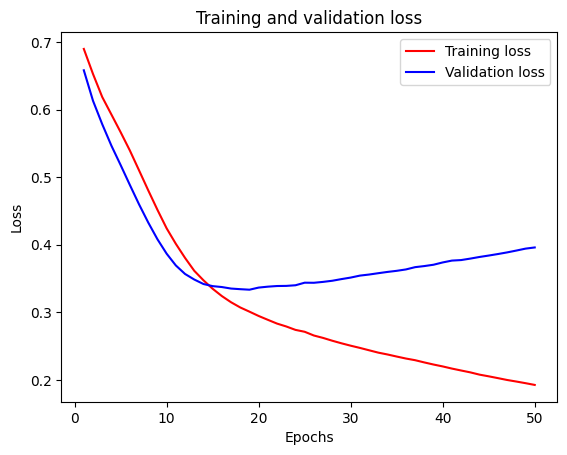

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
#plotting the data
plt.plot(epochs, loss,color='red', label='Training loss')
plt.plot(epochs, val_loss, color='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


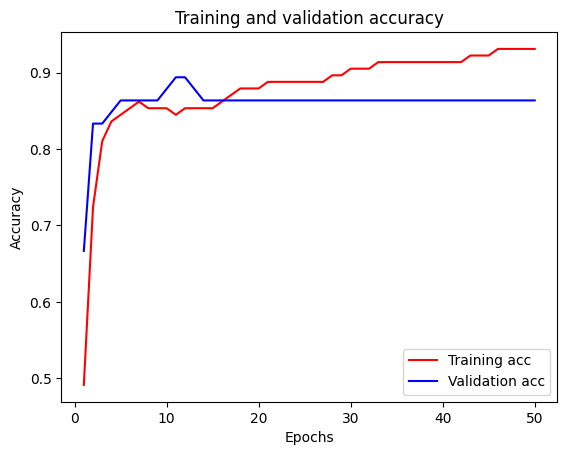

In [15]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
#final model
final_model = Sequential()
final_model.add(layers.Dense(50, activation='relu', input_shape=(xtrain.shape[1],)))
final_model.add(layers.Dense(50, activation='relu'))
final_model.add(layers.Dense(1, activation='sigmoid'))
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

3/3 [==============================] - 0s 5ms/step
[[37  0]
 [29  0]]


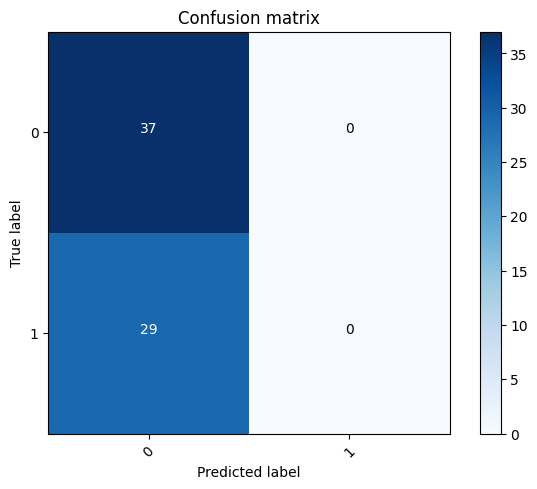

In [21]:
from keras.utils import to_categorical

ytrain = to_categorical(ytrain, 2)
ytest = to_categorical(ytest, 2)# Predict the values from the validation dataset 
pred_label = model.predict(xtest)
# Convert predictions classes to one hot vectors 
pred_label_classes = np.argmax(pred_label, axis = 1) 
# Convert validation observations to one hot vectors
label_true = np.argmax(ytest,axis = 1) 
#print('Class with highest probability: ', label_true)
# compute the confusion matrix
confusion_mtx = confusion_matrix(label_true, pred_label_classes) 
print(confusion_mtx)
# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))